<a href="https://colab.research.google.com/github/ibonetc/DeepLearning_Salud/blob/main/Ejemplo_CNN_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de imágenes para clasificar Covid



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

## Cargando los datos

In [ ]:
!unzip '/content/drive/MyDrive/HealthData/COVID-RX.zip'

In [3]:
os.listdir('/content/COVID-RX')

['COVID', 'Normal']

In [18]:
covid_data = glob.glob("/content/COVID-RX/COVID/*.png")
normal_data = glob.glob("/content/COVID-RX/Normal/*.png")

In [ ]:
covid_data

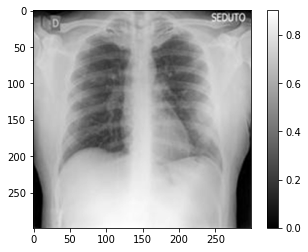

In [13]:
img = plt.imread(covid_data[0])
plt.gray()
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [16]:
img = plt.imread(normal_data[0])

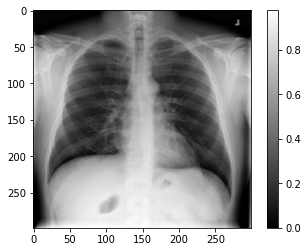

In [6]:
img = plt.imread(normal_data[0])
plt.gray()
plt.imshow(img)
plt.grid(False)
plt.colorbar()

In [7]:
print(len(covid_data),len(normal_data))

3616 3617


Ejemplo de las primeras 20 imágenes normales y con covid

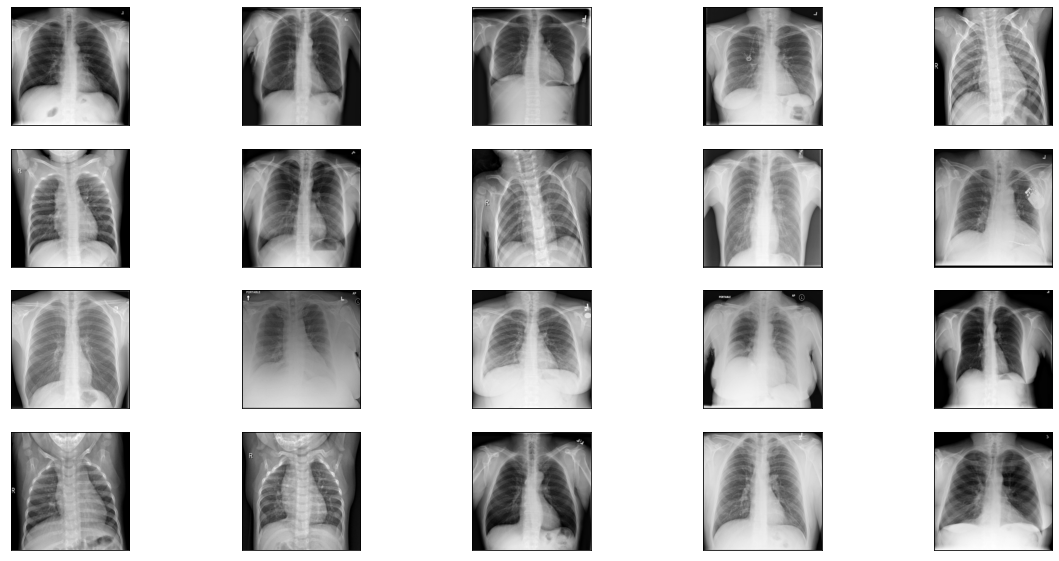

In [9]:
plt.figure(figsize=(20,10))
for i in range(20):
  img = plt.imread(normal_data[i])
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
plt.show()

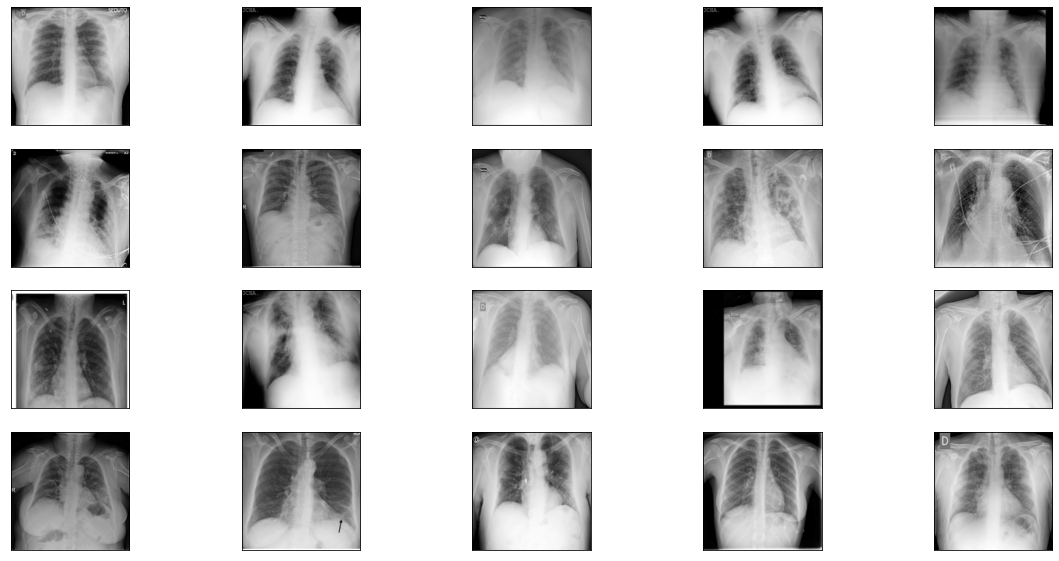

In [8]:
plt.figure(figsize=(20,10))
for i in range(20):
  img = plt.imread(covid_data[i])
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
plt.show()

Etiquetando las imágenes

Labels : 

0 - NORMAL

1 - COVID

Crearemos un Dataframe con pandas donde tengamos la dirección de la imagen y la etiqueta asociada

In [11]:
labels=np.concatenate([[0]*len(normal_data) , [1]*len(covid_data)])
data_covid_normal=np.concatenate((normal_data , covid_data))

In [12]:
data = pd.DataFrame({'path':data_covid_normal,'class':labels})

In [13]:
data

,path,class
0,/content/COVID-RX/Normal/Normal-3099.png,0
1,/content/COVID-RX/Normal/Normal-1963.png,0
2,/content/COVID-RX/Normal/Normal-3285.png,0
3,/content/COVID-RX/Normal/Normal-53.png,0
4,/content/COVID-RX/Normal/Normal-978.png,0
...,...,...
7228,/content/COVID-RX/COVID/COVID-1292.png,1
7229,/content/COVID-RX/COVID/COVID-607.png,1
7230,/content/COVID-RX/COVID/COVID-2769.png,1
7231,/content/COVID-RX/COVID/COVID-3559.png,1


## Normalizar y Dividir en Entrenamiento y Prueba
Usamos ImageDataGenerator para poder cargar las imágenes por batch, más eficiente.
Normalizamos las imágenes, dividiéndolas por 255 y seleccionamos un 20% para validación.

In [20]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [21]:
batch_size=64
train_it = datagen.flow_from_directory('/content/COVID-RX', class_mode='binary', 
                                       batch_size=batch_size, target_size=(64, 64), subset='training')
val_it = datagen.flow_from_directory('/content/COVID-RX', class_mode='binary', 
                                       batch_size=batch_size, target_size=(64, 64), subset='validation',shuffle=False)

Found 5787 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.


## Definiendo un modelo

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [23]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
history=classifier.fit(train_it, epochs = 10,validation_data=val_it)

Epoch 1/10
91/91 [==============================] - 27s 186ms/step - loss: 0.5203 - accuracy: 0.7297 - val_loss: 0.3447 - val_accuracy: 0.8638
Epoch 2/10
91/91 [==============================] - 16s 180ms/step - loss: 0.3860 - accuracy: 0.8267 - val_loss: 0.2865 - val_accuracy: 0.8790
Epoch 3/10
91/91 [==============================] - 16s 181ms/step - loss: 0.3203 - accuracy: 0.8630 - val_loss: 0.2480 - val_accuracy: 0.9053
Epoch 4/10
91/91 [==============================] - 16s 178ms/step - loss: 0.2739 - accuracy: 0.8901 - val_loss: 0.2138 - val_accuracy: 0.9212
Epoch 5/10
91/91 [==============================] - 16s 180ms/step - loss: 0.2542 - accuracy: 0.8960 - val_loss: 0.2481 - val_accuracy: 0.9025
Epoch 6/10
91/91 [==============================] - 16s 181ms/step - loss: 0.2217 - accuracy: 0.9096 - val_loss: 0.1943 - val_accuracy: 0.9253
Epoch 7/10
91/91 [==============================] - 16s 180ms/step - loss: 0.2068 - accuracy: 0.9174 - val_loss: 0.2075 - val_accuracy: 0.9281

In [25]:
classifier.evaluate(val_it)

23/23 [==============================] - 3s 144ms/step - loss: 0.1695 - accuracy: 0.9343


[0.16953717172145844, 0.934301495552063]

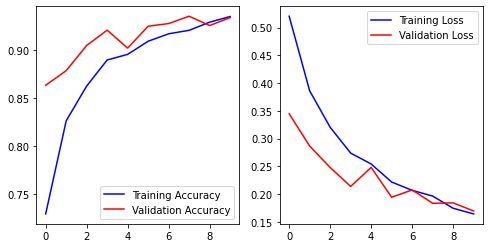

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()

In [27]:
predictions = classifier.predict(val_it)

In [28]:
predictions

array([[0.01172143],
       [0.00700475],
       [0.01644198],
       ...,
       [0.33642972],
       [0.9989807 ],
       [0.13233498]], dtype=float32)

In [29]:
val_it.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [30]:
val_it.filepaths

['/content/COVID-RX/COVID/COVID-1.png',
 '/content/COVID-RX/COVID/COVID-10.png',
 '/content/COVID-RX/COVID/COVID-100.png',
 '/content/COVID-RX/COVID/COVID-1000.png',
 '/content/COVID-RX/COVID/COVID-1001.png',
 '/content/COVID-RX/COVID/COVID-1002.png',
 '/content/COVID-RX/COVID/COVID-1003.png',
 '/content/COVID-RX/COVID/COVID-1004.png',
 '/content/COVID-RX/COVID/COVID-1005.png',
 '/content/COVID-RX/COVID/COVID-1006.png',
 '/content/COVID-RX/COVID/COVID-1007.png',
 '/content/COVID-RX/COVID/COVID-1008.png',
 '/content/COVID-RX/COVID/COVID-1009.png',
 '/content/COVID-RX/COVID/COVID-101.png',
 '/content/COVID-RX/COVID/COVID-1010.png',
 '/content/COVID-RX/COVID/COVID-1011.png',
 '/content/COVID-RX/COVID/COVID-1012.png',
 '/content/COVID-RX/COVID/COVID-1013.png',
 '/content/COVID-RX/COVID/COVID-1014.png',
 '/content/COVID-RX/COVID/COVID-1015.png',
 '/content/COVID-RX/COVID/COVID-1016.png',
 '/content/COVID-RX/COVID/COVID-1017.png',
 '/content/COVID-RX/COVID/COVID-1018.png',
 '/content/COVID-R

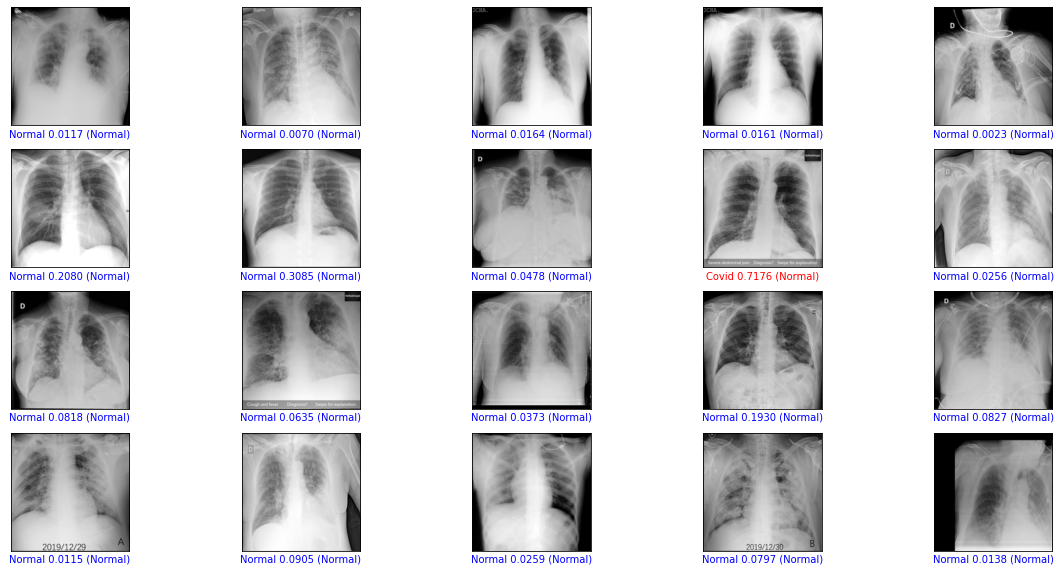

In [32]:
plt.figure(figsize=(20,10))
for index_image in range(20):
  plt.subplot(4, 5, index_image+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  img=plt.imread(val_it.filepaths[index_image])
  plt.imshow(img)
  predicted_label = "Normal" if predictions[index_image]<0.5 else "Covid"
  real_label="Normal" if val_it.labels[index_image]==0 else "Covid"
  color= 'blue' if predicted_label == real_label else 'red'
  plt.xlabel(f'{predicted_label} {np.max(predictions[index_image]):.4f} ({real_label})', color=color)

Binarizar la salida de predicción

In [33]:
predictions_label=[(0 if element<0.5 else 1) for element in predictions]

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_it.labels, predictions_label)

In [36]:
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
print(accuracy, misclass)

0.9343015214384509 0.06569847856154909


In [35]:
cm

array([[688,  35],
       [ 60, 663]])

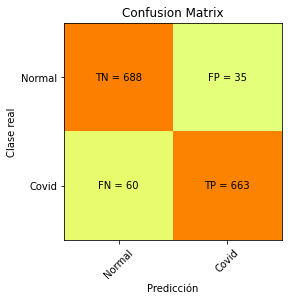

In [37]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','Covid']
plt.title('Confusion Matrix')
plt.ylabel('Clase real')
plt.xlabel('Predicción')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),ha="center", va="center")
        plt.rcParams["axes.grid"] = False
plt.show()